In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from numpy import hstack
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
import itertools
%matplotlib inline



In [4]:
Datos3K=read_csv('/content/drive/MyDrive/Colab Notebooks/3Koutfit.csv',delimiter=',', index_col=False)
Datos3K = array(Datos3K)



In [5]:
Datos3K.shape

(150528, 2994)

In [ ]:
Yvalues = []
for j in range(4):
  for i in range(2994): 
    Yvalues.append(i)
print(len(Yvalues))


11976


In [6]:
Yvalues2 = []
for i in range(2994): 
  Yvalues2.append(i)
print(len(Yvalues2))

2994


In [7]:
parte1=(Datos3K[0:50176,:])
parte2=(Datos3K[50176:100352,:])
parte3=(Datos3K[100352:,:])
print(parte1.shape,parte2.shape,parte3.shape)

(50176, 2994) (50176, 2994) (50176, 2994)


In [ ]:
Data1=list()
Data1 = np.concatenate([parte1, parte2,parte3])
Data2 = np.concatenate([parte1, parte3,parte2])
Data3 = np.concatenate([parte3, parte2,parte1])
Data4 = np.concatenate([parte2, parte3,parte1])

Data1

array([[185., 168.,   0., ...,   0.,   0.,   0.],
       [181., 164.,   0., ...,   0.,   0.,   0.],
       [174., 154.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   1.,   1., ...,   3.,   1.,   0.],
       [  0.,   0.,   1., ...,   7.,   1.,   0.],
       [  0.,   1.,   1., ...,  15.,   1.,   0.]])

In [ ]:
Data1=Data1.transpose()
Data2=Data2.transpose()
Data3=Data3.transpose()
Data4=Data4.transpose()
DatosCompletos=np.concatenate([Data1, Data2,Data3,Data4])

In [ ]:
DatosCompletos=DatosCompletos.transpose()

In [ ]:
print(DatosCompletos.shape)

(150528, 11976)


In [ ]:
DatosCompletos=DatosCompletos.transpose()

In [ ]:
DatosCompletos

array([[185., 181., 174., ...,   0.,   0.,   0.],
       [168., 164., 154., ...,   1.,   0.,   1.],
       [  0.,   0.,   0., ...,   1.,   1.,   1.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 17.,  54., 105., ...,   0.,   0.,   0.],
       [163., 170., 200., ...,   0.,   0.,   0.]])

In [ ]:
X=DatosCompletos
y=array(Yvalues)
y=y.reshape(11976,1)
print(X.shape,y)

NameError: ignored

In [8]:
parte1= parte1.transpose()
parte1 =np.reshape(parte1,(parte1.shape[0],224,224,1))
parte2=parte2.transpose()
parte2 =np.reshape(parte2,(parte2.shape[0],224,224,1))
parte3=parte3.transpose()
parte3 =np.reshape(parte3,(parte3.shape[0],224,224,1))


In [ ]:
X =np.reshape(X,(X.shape[0],224,672,1))
X.shape

(11976, 224, 672, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                            

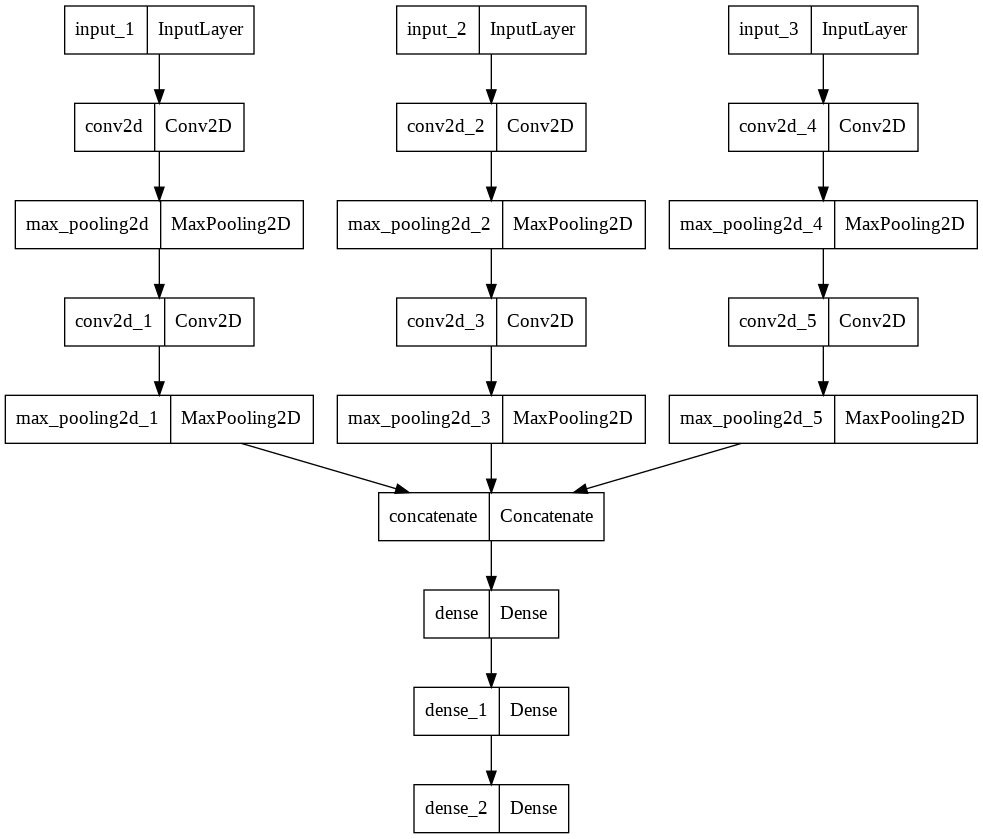

In [9]:
from keras.utils import plot_model

from keras.models import Model

from keras.layers import Input

from keras.layers import Dense

from keras.layers import Flatten

from keras.layers.convolutional import Conv2D

from keras.layers.pooling import MaxPooling2D

from tensorflow.keras.layers import concatenate



# first input model

visible1 = Input(shape=(224,224,1))

conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)

pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)

conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)

pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)

#flat1 = Flatten()(pool12)

# second input model

visible2 = Input(shape=(224,224,1))

conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)

pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)

conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)

pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)

#flat2 = Flatten()(pool22)


# tird input model

visible3 = Input(shape=(224,224,1))

conv31 = Conv2D(32, kernel_size=4, activation='relu')(visible3)

pool31 = MaxPooling2D(pool_size=(2, 2))(conv31)

conv32 = Conv2D(16, kernel_size=4, activation='relu')(pool31)

pool32 = MaxPooling2D(pool_size=(2, 2))(conv32)

#flat3 = Flatten()(pool32)

# merge input models

merge = concatenate([pool12, pool22,pool32])

# interpretation model

hidden1 = Dense(10, activation='relu')(merge)

hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='softmax')(hidden2)

model = Model(inputs=[visible1, visible2,visible3], outputs=output)

# summarize layers

print(model.summary())

# plot graph

plot_model(model, to_file='multiple_inputs.png')

In [10]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [11]:
model.fit([parte1,parte2,parte3],np.array(Yvalues2),epochs=20, batch_size=320)

Epoch 1/20
10/10 [==============================] - 13s 208ms/step - loss: 2983522.7500 - accuracy: 3.3400e-04
Epoch 2/20
10/10 [==============================] - 2s 182ms/step - loss: 2983522.7500 - accuracy: 3.3400e-04
Epoch 3/20
10/10 [==============================] - 2s 183ms/step - loss: 2983523.2500 - accuracy: 3.3400e-04
Epoch 4/20
10/10 [==============================] - 2s 180ms/step - loss: 2983523.2500 - accuracy: 3.3400e-04
Epoch 5/20
10/10 [==============================] - 2s 185ms/step - loss: 2983523.2500 - accuracy: 3.3400e-04
Epoch 6/20
10/10 [==============================] - 2s 184ms/step - loss: 2983523.5000 - accuracy: 3.3400e-04
Epoch 7/20
10/10 [==============================] - 2s 182ms/step - loss: 2983523.2500 - accuracy: 3.3400e-04
Epoch 8/20
10/10 [==============================] - 2s 184ms/step - loss: 2983522.7500 - accuracy: 3.3400e-04
Epoch 9/20
10/10 [==============================] - 2s 182ms/step - loss: 2983522.7500 - accuracy: 3.3400e-04
Epoch 10/